# TechLab Big Data - Direct Marketing

### Import delle librerie

Come prima cosa importiamo le librerie e i moduli che saranno necessari per l'implementazione del caso di studio. 

Le librerie di interesse sono: 

- Pandas: per la manipolazione di dati in formato sequenziale o tabellare;
- Matplot e Seaborn: per la generazione di grafici; 
- Scikit-learn: per i modelli di Machine Learning.

In [17]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
warnings.filterwarnings('ignore')
from inspect import signature
%matplotlib inline

from sklearn.preprocessing     import StandardScaler, LabelEncoder
from sklearn.model_selection   import KFold, train_test_split, cross_val_score
from sklearn                   import metrics
from sklearn.ensemble          import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.svm               import SVC
from sklearn.feature_selection import RFE, VarianceThreshold
from sklearn.metrics           import classification_report, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
from sklearn                   import tree
from sklearn.utils             import resample
from sklearn.linear_model      import LogisticRegression
from inspect                   import signature

Importiamo il dataset e mostriamo le prime osservazioni per capire com'è strutturato.

In [18]:
bank = pd.read_csv('Data/campagna-target.csv', sep = ';')
bank.head()

,eta,professione,stato_civile,istruzione,default,prestito_casa,prestito_personale,mese,giorno_settimana,campagne,giorni_p,precedente,outcome_p,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Importiamo le variabili di interesse dai precedenti notebook

In [19]:
with open("Data/X_train.pickle","rb") as f:
            X_train1 = pickle.load(f)
with open("Data/y_train.pickle","rb") as d:
            y_train1 = pickle.load(d)
with open("Data/X_test.pickle","rb") as g:
            X_test1 = pickle.load(g)
with open("Data/y_test.pickle","rb") as h:
            y_test1 = pickle.load(h)
with open("Data/k_fold.pickle","rb") as j:
           k_fold = pickle.load(j)
with open("Data/bank_final1.pickle","rb") as i:
           bank_final1= pickle.load(i) 
with open("Data/bank_scale_std.pickle","rb") as k:
           bank_scale_std= pickle.load(k) 
with open("Data/bank_scale_mean.pickle","rb") as l:
           bank_scale_mean= pickle.load(l) 

### Supervised Learnig - Classificazione

L'obiettivo a questo punto è trovare un algoritmo che, in base alle informazioni ottenute a partire dai dati in nostro possesso, sia in grado di classificare correttamente delle nuove osservazioni per le quali non conosciamo il valore della variabile target. In questo caso si parla di algoritmi supervisionati, o Supervised Learning, proprio perchè l'algoritmo impara dai dati per i quali conosce il valore della variabile target. Una volta trainato il modello, questo sarà in grado di fornire un valore per la variabile di interesse con un certo grado di accuratezza e, in base alla risposta ottenuta, possiamo agire di conseguenza: 
- Se otteniamo yes = 1 allora al cliente verrà proposta la campagna pubblicitaria;
- Se otteniamo yes = 0 allora al cliente non verrà proposta la campagna pubblicitaria. 

### Regressione Logistica

Il primo modello che possiamo testare per il nostro caso di studio è la Regressione Logistica. Partiamo da questo modello proprio perchè risulta essere il più semplice e di più facile interpretazione. La Regressione Logistica è un tipo di regressione non-lineare utilizzato quando la variabile dipendente assume solo due valori, quindi può essere sfruttata per un problema di classificazione a due categorie come nel nostro caso. L'output di questo modello è la probabilità con cui ogni singola osservazione appartiene alla classe di riferimento scelta. 

In [20]:
logmodel = LogisticRegression(random_state = 100) 
logmodel_weighted = LogisticRegression(random_state=0, class_weight='balanced') 


logmodel.fit(X_train1,y_train1)
logpred = logmodel.predict(X_test1)
LOGCV = round((cross_val_score(logmodel, X_train1, y_train1, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean()),4)*100
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test1, logpred))

print('Matrice di Confusione:')
print(conf_matrix)
print('\n')
print('Accuratezza: ',round(accuracy_score(y_test1, logpred)*100,2), '%')
print('Accuratezza con K-fold: ', round(LOGCV,4), '%')


logmodel_weighted.fit(X_train1,y_train1)
logpred_weighted = logmodel_weighted.predict(X_test1)
LOGCV_weighted = round((cross_val_score(logmodel_weighted, X_train1, y_train1, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean()),4)*100
conf_matrix_weighted = pd.DataFrame(data = confusion_matrix(y_test1, logpred_weighted))


print('\n')
print('Regressione Logistica con pesi per le classi bilanciati')
print('Matrice di Confusione:')
print(conf_matrix_weighted)
print('\n')
print('Accuratezza: ',round(accuracy_score(y_test1, logpred_weighted)*100,2), '%')
print('Accuratezza con K-fold: ', round(LOGCV_weighted,4), '%')

Matrice di Confusione:
      0    1
0  8398  402
1   689  378


Accuratezza:  88.94 %
Accuratezza con K-fold:  84.63 %


Regressione Logistica con pesi per le classi bilanciati
Matrice di Confusione:
      0     1
0  7541  1259
1   433   634


Accuratezza:  82.85 %
Accuratezza con K-fold:  81.07 %


Per quanto riguarda il primo modello implementato, cioè la Regressione Logistica con parametri assegnati di default, possiamo fare le seguenti analisi. Dai risultati presentati nella prima matrice di confusione riportata sopra, possiamo analizzare più nel dettaglio gli errori commessi dall'algoritmo nella classificazione delle osservazioni appartenenti al Test Set. 
<br>
8776 (8398 + 378) osservazioni sono state assegnate alla classe di appartenenza corretta e da questo si deduce il valore dell'accuratezza di 88,94%.  
<br> 
Le osservazioni che sono state classificate come clienti target per la campagna pubblicitaria quando in realtà sono risultati dei profili che non hanno sottoscritto il servizio sono in totale 402. Se non avessimo conosciuto come si è comportato il cliente come in questo caso, tutti questi clienti avrebbero fatto parte della campagna pubblicitaria anche se non direttamente interessati. 
<br> 
D'altra parte, le osservazioni che sono state classificate come clienti non target per la campagna pubblicitaria ma che in realtà hanno poi sottoscrittto il servizio proposto sono un totale di 689. In questo caso, senza conoscere l'output reale, i clienti relativi a queste osservazioni non sarebbero stati esposti alla campagna pubblicitaria quando invece sarebbero stati potenzialmente interessati, risultando in una perdita di potenziali clienti. 
<br>
Le medesime considerazioni possono essere fatte anche per il secondo modello per il quale abbiamo impostato i pesi da assegnare alle due classi. In questo modo, le classificazioni errate della classe di minoranza vengono penalizzate maggiormente. Questo si traduce in un maggior numero di osservazioni che vengono classificate come appartenenti alla classe 1 (sia classificate correttamente sia non correttamente), risultando così in un'accuratezza minore rispetto al modello precedente pari a 82,85%. 
 

Un metodo utilizzato per valutare la capacità di un algoritmo di classificare correttamente osservazioni appartenenti alle due classi è lo studio della curva ROC. In questo grafico vengono rappresentati i valori del tasso dei veri positivi e il tasso dei falsi positivi per diversi valori del parametro del classificatore, nel nostro caso la probabilità cut-off dalla Regressione Logistica. La diagonale in rosso rappresenta un classificatore casuale, mentre la linea blu è la curva ROC del nostro classificatore. Più questa linea si avvicina al punto di coordinate (0,1), più il classificatore è accurato, essendo la linea che unisce i punti di coordinate (0,0), (0,1) e (1,1) il classificatore perfetto. Un altro parametro da analizzare in questo grafico è l'AUC, "area sotto la curva", che indica la probabilità che un'osservazione estratta a caso sia assegnata alla sua effettiva classe di appartenenza dal classificatore.
<br>
Riportiamo di seguiti le curve ROC per i differenti modelli di Regressione Logistica visti fino ad ora, le quali risultano essere molto simili tra loro. 

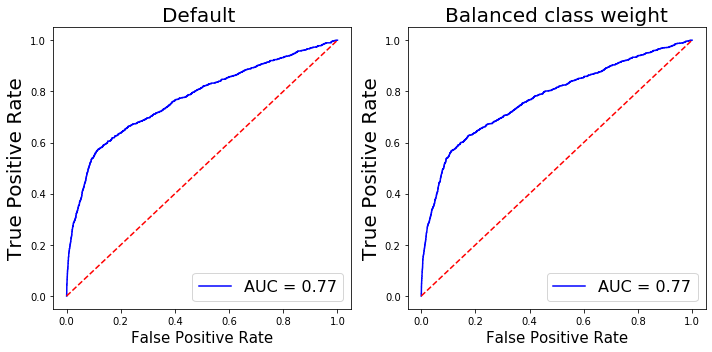

In [21]:
fig, ax_arr = plt.subplots(nrows = 1, ncols = 2, figsize=(10,5))

#Regressione Logistica Default
probs = logmodel.predict_proba(X_test1)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test1, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

#fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6,6))
ax_arr[0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0].plot([0, 1], [0, 1],'r--')
ax_arr[0].set_title('Default ',fontsize=20)
ax_arr[0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0].legend(loc = 'lower right', prop={'size': 16})

#Regressione Logistica - balanced weight
probs = logmodel_weighted.predict_proba(X_test1)
preds = probs[:,1]
fprlog_w, tprlog_w, thresholdlog_w = metrics.roc_curve(y_test1, preds)
roc_auclog_w = metrics.auc(fprlog_w, tprlog_w)

ax_arr[1].plot(fprlog_w, tprlog_w, 'b', label = 'AUC = %0.2f' % roc_auclog_w)
ax_arr[1].plot([0, 1], [0, 1],'r--')
ax_arr[1].set_title('Balanced class weight',fontsize=20)
ax_arr[1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1].legend(loc = 'lower right', prop={'size': 16})


plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 
plt.show()

Ci sono poi altri indicatori della bontà del modello che vengono di seguito calcolati per vedere come si comporta il classificatore in questione nelle due diverse versioni. 
<br>
Innanzitutto, possiamo notare il valore dell'accuratezza pari a 89% (come già visto in precedenza). Questo valore indica il numero di osservazioni classificate correttamente sul totale delle osservazioni e nel nostro caso risulta essere abbastanza soddisfacente. Non bisogna però fermarsi allo studio di questo singolo valore perchè, nel caso di classi sbilanciate come il nostro, potrebbe essere non sufficiente. Bisogna controllare i valori di altre due metriche importanti: la precisione e il recall. Questi due dati tengono conto anche delle osservazioni classificate in modo scorretto, al contrario dell'accuratezza, e sono proprio queste osservazioni che possono avere degli impatti anche notevoli a livello di costi per il business: 
<br>
- la precisione è l’abilità di un classificatore di non etichettare un’istanza positiva che è in realtà negativa.  Il valore di questa metrica è importante soprattutto quando il costo dei falsi positivi è alto, nel nostro caso il fatto di includere un cliente nella campagna pubblicitaria quando in realtà non risulta interessato;

- il recall è la capacità di un classificatore di trovare tutte le istanze positive. Questa metrica è di interesse, invece, quando il costo dei falsi negativi è alto, nel nostro caso il fatto di non includere un cliente potenzialmente interessato nella campagna pubblicitaria; 

- lo score-f1 è una media armonica tra precision e recall, quindi tiene conto dell'errore di classificazione di entrambe le classi. 
<br>
Per il nostro modello, tutti e tre gli indicatori risultano essere piuttosto bassi (fare riferimento alla riga relativa al valore 1) nonostante l'accuratezza risultasse invece molto elevata. 
<br> 
Per questo motivo, nelle sezioni seguenti esploreremo anche altri modelli predittivi più complessi per vedere se si possono ottenere risultati migliori.


In [23]:
print('Regressione Logistica Default')
print(classification_report(y_test1, logpred))

report_log = classification_report(y_test1, logpred, output_dict=True)
precision_log = round(report_log['1']['precision'],2)
recall_log = round(report_log['1']['recall'],2)
f1_log = round(report_log['1']['f1-score'],2)

print('Regressione Logistica - Balanced weight')
print(classification_report(y_test1, logpred_weighted))

report_logw = classification_report(y_test1, logpred_weighted, output_dict=True)
precision_logw = round(report_logw['1']['precision'],2)
recall_logw = round(report_logw['1']['recall'],2)
f1_logw = round(report_logw['1']['f1-score'],2)

Regressione Logistica Default
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      8800
           1       0.48      0.35      0.41      1067

    accuracy                           0.89      9867
   macro avg       0.70      0.65      0.67      9867
weighted avg       0.88      0.89      0.88      9867

Regressione Logistica - Balanced weight
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      8800
           1       0.33      0.59      0.43      1067

    accuracy                           0.83      9867
   macro avg       0.64      0.73      0.66      9867
weighted avg       0.88      0.83      0.85      9867



Nonnostante i risultati ottenuti, una volta che abbiamo trainato il nostro modello, possiamo comunque provare ad utilizzarlo per classificare delle nuove osservazioni in near-real-time. Supponiamo che un nostro cliente si colleghi all'internet banking e raccogliamo direttamente i dati corrispondenti dalle diverse fonti. 
<br> 
<br>
I suoi dati anagrafici:
* età : 34 anni; 
* professione: libero professionista
* stato civile: sposato; 
* livello di educazione: universitario.

I dati relativi al suo profilo finanziario: 
* default: no;
* mutuo sulla casa: si; 
* mutuo personale: no. 

I dati relativi alla campagna pubblicitaria: 
* mese: settembre; 
* giorno della settimana: mercoledì;
* campagne: 6;
* giorni_p: 4; 
* precedente: 1; 
* outcome_p: successo.
<br>

E infine i dati socio-economici relativi al periodo in cui è stato effettuato l'accesso. 

<br> A questo punto, siamo in grado di predirre la classe di appartenenza di questo cliente con un certo livello di accuratezza e quindi agire di conseguenza e proporre o meno la campagna pubblicitaria all'interno della pagina personale dell'internet banking. In questo caso, il modello di Regressione Logistica stima le probabilità di appartenenza alle due categorie differenti e assegna l'osservazione alla classe con la probabilità più alta. 

In [24]:
new_data = np.array([[25, 1, 999, 0, 1.1, 93.994, -36.4, 4.857, 5191, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 
            0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]])


new_data = pd.DataFrame(new_data, columns=bank_final1.columns[0:50])    
new_data_scale = (new_data.iloc[:, 0:9] - bank_scale_mean)/bank_scale_std

new_data = pd.concat([new_data_scale, new_data.iloc[:, 9:51]], axis=1)

print('Le probabilità di appartenenza alle classi sono: ', round(logmodel.predict_proba(new_data)[0][0],2), 
      'e ' ,round(logmodel.predict_proba(new_data)[0][1],2))
print('Quindi la classe di appartenza di questa osservazione è: ', logmodel.predict(new_data)[0])


Le probabilità di appartenenza alle classi sono:  0.7 e  0.3
Quindi la classe di appartenza di questa osservazione è:  0


### Albero Decisionale

Proviamo ora un altro classificatore: l'albero decisionale.
<br>
Questo algoritmo produce un grafico ad albero dove ogni nodo interno rappresenta una variabile, un arco verso un nodo figlio rappresenta un possibile valore o intervallo di valori per quella proprietà e una foglia il valore predetto per la variabile obiettivo a partire dai valori delle altre proprietà, nel nostro caso l'appartenenza ad una delle due classi. 
<br> 
Gli alberi decisionali soffrono dell'aumento del numero di variabili e la presenza di molte variabili dummizzate nel nostro dataset potrebbe influenzare negativamente i risultati ottenuti da questo algoritmo. Da studi in letteratura, è stato verificato che, in alcuni casi, i risultati ottenuti senza dummizzare le variabili sono confrontabili ma il tempo di training del modello è decisamente inferiore. 
<br>
Per questo motivo, per prima cosa, riorganizziamo la struttura del dataset trasformando le variabili categoriche in variabili numeriche, in cui ogni livello corrisponde a un intero.

In [29]:
bank_client = bank.iloc[: , 0:7]
labelencoder_X = LabelEncoder()

bank_client['professione']      = labelencoder_X.fit_transform(bank_client['professione']) 
job = pd.DataFrame([labelencoder_X.inverse_transform(bank_client['professione'].sort_values().unique())])
print('Colonna Professione trasformata tramite LabelEncoder:')

print( pd.Series(labelencoder_X.inverse_transform(bank_client['professione'].sort_values().unique())))

bank_client['stato_civile']  = labelencoder_X.fit_transform(bank_client['stato_civile']) 
marital = pd.DataFrame([labelencoder_X.inverse_transform(bank_client['stato_civile'].sort_values().unique())])

bank_client['istruzione']= labelencoder_X.fit_transform(bank_client['istruzione']) 
education = pd.DataFrame([labelencoder_X.inverse_transform(bank_client['istruzione'].sort_values().unique())])

bank_client['default']  = labelencoder_X.fit_transform(bank_client['default'])
default = pd.DataFrame([labelencoder_X.inverse_transform(bank_client['default'].sort_values().unique())])

bank_client['prestito_casa']  = labelencoder_X.fit_transform(bank_client['prestito_casa']) 
housing = pd.DataFrame([labelencoder_X.inverse_transform(bank_client['prestito_casa'].sort_values().unique())])

bank_client['prestito_personale']     = labelencoder_X.fit_transform(bank_client['prestito_personale']) 
loan = pd.DataFrame([labelencoder_X.inverse_transform(bank_client['prestito_personale'].sort_values().unique())])

bank_time = bank.iloc[: , 7:9]
labelencoder_X = LabelEncoder()
bank_time['mese']       = labelencoder_X.fit_transform(bank_time['mese']) 
month = pd.DataFrame([labelencoder_X.inverse_transform(bank_time['mese'].sort_values().unique())])

bank_time['giorno_settimana'] = labelencoder_X.fit_transform(bank_time['giorno_settimana'])
day_of_week = pd.DataFrame([labelencoder_X.inverse_transform(bank_time['giorno_settimana'].sort_values().unique())])

bank_o = bank.loc[: , ['campagne', 'giorni_p','precedente', 'outcome_p']]
bank_o['outcome_p'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)
bank_se = bank.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

bank_final_encoded= pd.concat([bank_client, bank_time, bank_se, bank_o], axis = 1)
bank_final_encoded = bank_final_encoded[['eta', 'professione', 'stato_civile', 'istruzione', 'default', 'prestito_casa', 
                                         'prestito_personale', 'mese', 'giorno_settimana', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campagne', 'giorni_p', 'precedente', 'outcome_p']]
        
y = pd.get_dummies(bank['y'], columns = ['y'], drop_first = True)        
bank_final_encoded = pd.concat([bank_final_encoded, y], axis = 1)

Colonna Professione trasformata tramite LabelEncoder:
0            admin.
1       blue-collar
2      entrepreneur
3         housemaid
4        management
5     self-employed
6          services
7           student
8        technician
9        unemployed
10          unknown
dtype: object


In [30]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(bank_final_encoded.drop('yes', axis = 1), 
                                                    bank_final_encoded['yes'], test_size = 0.25, random_state = 101)


k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
df_total = pd.concat([X_train2, y_train2], axis=1)

df_majority = df_total[df_total['yes'] == 0]
df_minority = df_total[df_total['yes'] == 1]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,    
                                 n_samples= int(3139*2),
                                 random_state=123) 


df_upsampled = pd.concat([df_majority, df_minority_upsampled])
y_new = df_upsampled['yes']

X_train2 = df_upsampled.drop('yes', axis=1)
y_train2 = df_upsampled['yes']

Per questo modello valgono le considerazioni fatte in precedenza per la Regressione Logistica. 
<br> 
Procediamo nella medesima maniera anche per l'albero decisionale: 
* Implementazione del modello; 
* Studio della matrice di confusione; 
* Studio della precision e recall dal report di classificazione.


In [31]:
dectree = tree.DecisionTreeClassifier(random_state=123)
dectree.fit(X_train2, y_train2)
dectreepred = dectree.predict(X_test2)
DTCV = round((cross_val_score(dectree, X_train2, y_train2, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean()),4)*100
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test2, dectreepred))

print('Matrice di Confusione:')
print(conf_matrix)
print('\n')
print('Accuratezza: ',round(accuracy_score(y_test2, dectreepred)*100,2), '%')
print('Accuratezza con K-fold: ', round(DTCV,4), '%')

Matrice di Confusione:
      0    1
0  8006  794
1   744  323


Accuratezza:  84.41 %
Accuratezza con K-fold:  90.4 %


In [32]:
print(classification_report(y_test2, dectreepred))
report_dt = classification_report(y_test2, dectreepred, output_dict=True)
precision_dt = round(report_dt['1']['precision'],2)
recall_dt = round(report_dt['1']['recall'],2)
f1_dt = round(report_dt['1']['f1-score'],2)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      8800
           1       0.29      0.30      0.30      1067

    accuracy                           0.84      9867
   macro avg       0.60      0.61      0.60      9867
weighted avg       0.85      0.84      0.85      9867



In [33]:
new_data = np.array([[25, 5, 1, 6, 0, 2, 0, 9, 4, 1.1, 93.994, -36.4, 4.857, 5191, 1, 999, 0, 1]])

new_data = pd.DataFrame(new_data, columns=X_train2.columns[0:18])    

print('Le probabilità di appartenenza alle classi sono: ', round(dectree.predict_proba(new_data)[0][0],2), 
      'e ' ,round(dectree.predict_proba(new_data)[0][1],2))
print('Quindi la classe di appartenza di questa osservazione è: ', dectree.predict(new_data)[0])

Le probabilità di appartenenza alle classi sono:  1.0 e  0.0
Quindi la classe di appartenza di questa osservazione è:  0


### Classificatore Random Forest

Una foresta casuale è un classificatore che è composto da molti alberi di decisione e dà in uscita la classe che appare più volte, quindi secondo una logica di voto di maggioranza, negli alberi presi individualmente. L'algoritmo degli alberi decisionali che compongono la foresta casuale si differenzia dall'algoritmo standard perchè, ad ogni nodo decisionale, viene selezionata la variabile d'interesse solo tra quelle presenti in un sottoinsieme casuale del totale delle variabili. 

Per questo modello valgono le considerazioni fatte in precedenza per la Regressione Logistica e l'Albero Decisionale. 
<br> 
Procediamo nella medesima maniera anche per la Random Forest: 
* Implementazione del modello; 
* Studio della matrice di confusione; 
* Studio della precision e recall dal report di classificazione; 
* Studio della curva ROC. 

In [35]:
rfc = RandomForestClassifier(n_estimators = 200, n_jobs=2, random_state = 12) #criterion = entropy,gini
rfc.fit(X_train2, y_train2)
rfcpred = rfc.predict(X_test2)
RFCCV = round((cross_val_score(rfc, X_train2, y_train2, cv=k_fold, n_jobs=2, scoring = 'accuracy').mean()),4)*100

conf_matrix = pd.DataFrame(data = confusion_matrix(y_test2, rfcpred))


print('Matrice di Confusione:')
print(conf_matrix)
print('\n')
print('Accuratezza: ',round(accuracy_score(y_test2, rfcpred),2)*100, '%')
print('Accuratezza con K-fold: ', round(RFCCV,2), '%')

Matrice di Confusione:
      0    1
0  8486  314
1   748  319


Accuratezza:  89.0 %
Accuratezza con K-fold:  94.9 %


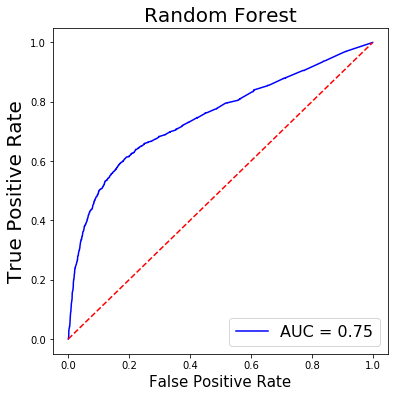

In [36]:
#fig, ax_arr = plt.subplots(nrows = 1, ncols = 3, figsize=(15,5))

probs = rfc.predict_proba(X_test2)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test2, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

fig, ax_arr = plt.subplots(nrows = 1, ncols = 1, figsize = (6,6))
ax_arr.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr.plot([0, 1], [0, 1],'r--')
ax_arr.set_title('Random Forest',fontsize=20)
ax_arr.set_ylabel('True Positive Rate',fontsize=20)
ax_arr.set_xlabel('False Positive Rate',fontsize=15)
ax_arr.legend(loc = 'lower right', prop={'size': 16})

plt.show()

In [37]:
print(classification_report(y_test2, rfcpred))

report_rfc = classification_report(y_test2, rfcpred, output_dict=True)
precision_rfc = round(report_rfc['1']['precision'],2)
recall_rfc = round(report_rfc['1']['recall'],2)
f1_rfc = round(report_rfc['1']['f1-score'],2)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      8800
           1       0.50      0.30      0.38      1067

    accuracy                           0.89      9867
   macro avg       0.71      0.63      0.66      9867
weighted avg       0.87      0.89      0.88      9867



In [38]:
new_data = np.array([[25, 5, 1, 6, 0, 2, 0, 9, 4, 1.1, 93.994, -36.4, 4.857, 5191, 1, 999, 0, 1]])

new_data = pd.DataFrame(new_data, columns=X_train2.columns[0:18])    

print('Le probabilità di appartenenza alle classi sono: ', round(rfc.predict_proba(new_data)[0][0],2), 
      'e ' ,round(rfc.predict_proba(new_data)[0][1],2))
print('Quindi la classe di appartenza di questa osservazione è: ', rfc.predict(new_data)[0])

Le probabilità di appartenenza alle classi sono:  0.7 e  0.3
Quindi la classe di appartenza di questa osservazione è:  0


### Gradient  Boosting 

Il Gradient Boosting è una tecnica il cui obiettivo è riprodurre un modello predittivo nella forma di un insieme di modelli predittivi deboli, tipicamente alberi di decisione. In questo caso, il Gradient Boosting costruisce gli alberi decisionali uno alla volta e ogni nuovo albero corregge gli errori fatti dall'albero trainato al passaggio precedente. Intuitivamente, l'algoritmo cerca di minimizzare i residui degli errori della classificazione; algoritmicamente, questo si traduce nel minimizzare la funzione obiettivo del modello in questione. 

In [39]:
gbk = GradientBoostingClassifier()
gbk.fit(X_train2, y_train2)
gbkpred = gbk.predict(X_test2)
GBKCV = round((cross_val_score(gbk, X_train2, y_train2, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean()),4)*100
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test2, gbkpred))


print('Matrice di Confusione:')
print(conf_matrix)
print('\n')
print('Accuratezza: ',round(accuracy_score(y_test2, gbkpred),2)*100, '%')
print('Accuratezza con K-fold: ', round(GBKCV,2), '%')

Matrice di Confusione:
      0    1
0  8367  433
1   647  420


Accuratezza:  89.0 %
Accuratezza con K-fold:  85.54 %


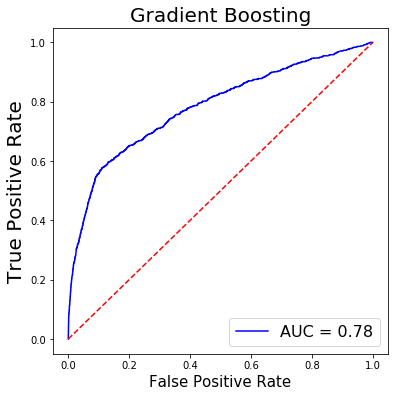

In [40]:
probs = gbk.predict_proba(X_test2)
preds = probs[:,1]
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test2, preds)
roc_aucgbk = metrics.auc(fprgbk, tprgbk)

fig, ax_arr = plt.subplots(nrows = 1, ncols = 1, figsize = (6,6))
ax_arr.plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
ax_arr.plot([0, 1], [0, 1],'r--')
ax_arr.set_title('Gradient Boosting',fontsize=20)
ax_arr.set_ylabel('True Positive Rate',fontsize=20)
ax_arr.set_xlabel('False Positive Rate',fontsize=15)
ax_arr.legend(loc = 'lower right', prop={'size': 16})

plt.show()

In [41]:
print(classification_report(y_test2, gbkpred))
report_gbk = classification_report(y_test2, gbkpred, output_dict=True)
precision_gbk = round(report_gbk['1']['precision'],2)
recall_gbk = round(report_gbk['1']['recall'],2)
f1_gbk = round(report_gbk['1']['f1-score'],2)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      8800
           1       0.49      0.39      0.44      1067

    accuracy                           0.89      9867
   macro avg       0.71      0.67      0.69      9867
weighted avg       0.88      0.89      0.89      9867



In [42]:
new_data = np.array([[25, 5, 1, 6, 0, 2, 0, 9, 4, 1.1, 93.994, -36.4, 4.857, 5191, 1, 999, 0, 1]])

new_data = pd.DataFrame(new_data, columns=X_train2.columns[0:18])    

print('Le probabilità di appartenenza alle classi sono: ', round(gbk.predict_proba(new_data)[0][0],2), 
      'e ' ,round(gbk.predict_proba(new_data)[0][1],2))
print('Quindi la classe di appartenza di questa osservazione è: ', gbk.predict(new_data)[0])

Le probabilità di appartenenza alle classi sono:  0.38 e  0.62
Quindi la classe di appartenza di questa osservazione è:  1


### Conclusioni

A seconda del nostro obiettivo e delle specifiche business, possiamo fare una classifica dei modelli considerati fino ad ora rispetto alle varie metriche di interesse. In tal modo, viene identificato il modello più performante in ogni situazione. 

In [43]:
models = pd.DataFrame({
                'Models': ['Regressione Logistica','Regressione Logistica - Balanced Weights',
                          'Decision Tree','Random Forest Classifier',
                          'Gradient Boosting'],
                'Score':  [LOGCV, LOGCV_weighted, DTCV, RFCCV, GBKCV],
                'Precision': [precision_log, precision_logw, precision_dt, precision_rfc, precision_gbk] ,
                'Recall': [recall_log, recall_logw, recall_dt, recall_rfc, recall_gbk]})

print(models[['Models', 'Score']].sort_values(by='Score', ascending=False))
print('\n')
print(models[['Models', 'Precision']].sort_values(by='Precision', ascending=False))
print('\n')
print(models[['Models', 'Recall']].sort_values(by='Recall', ascending=False))

                                     Models  Score
3                  Random Forest Classifier  94.90
2                             Decision Tree  90.40
4                         Gradient Boosting  85.54
0                     Regressione Logistica  84.63
1  Regressione Logistica - Balanced Weights  81.07


                                     Models  Precision
3                  Random Forest Classifier       0.50
4                         Gradient Boosting       0.49
0                     Regressione Logistica       0.48
1  Regressione Logistica - Balanced Weights       0.33
2                             Decision Tree       0.29


                                     Models  Recall
1  Regressione Logistica - Balanced Weights    0.59
4                         Gradient Boosting    0.39
0                     Regressione Logistica    0.35
2                             Decision Tree    0.30
3                  Random Forest Classifier    0.30


Come alternativa all'utilizzo di un singolo modello, possiamo definire una strategia di voto che combina i risultati ottenuti dai diversi modelli. Viene fatta una media delle probabilità di appartenenza ad ogni classe per ogni modello e poi l'osservazione viene assegnata alla classe con probabilità più alta.   

In [44]:
def fit_multiple_estimators(classifiers, X_list, y, sample_weights = None):

    # Fit all estimators with their respective feature arrays
    estimators_ = [clf.fit(X, y) if sample_weights is None else clf.fit(X, y, sample_weights) for clf, X in zip([clf for _, clf in classifiers], X_list)]
    return estimators_


def predict_from_multiple_estimator(estimators, X_list, weights = None):

    # Predict 'soft' voting with probabilities

    pred1 = np.asarray([clf.predict_proba(X) for clf, X in zip(estimators, X_list)])
    pred2 = np.average(pred1, axis=0, weights=weights)
    pred = np.argmax(pred2, axis=1)
    
    return pred, pred1, pred2


In [45]:
X_train_list = [X_train1, X_train2, X_train2]
X_test_list = [X_test1, X_test2, X_test2]

In [46]:
classifiers = [('logmodel',  LogisticRegression()),
               ('random forest', RandomForestClassifier(n_estimators = 200, n_jobs=2, random_state = 12)),
               ('gradient boosting', GradientBoostingClassifier())]

In [47]:
fitted_estimators = fit_multiple_estimators(classifiers, X_train_list, y_train1)

In [48]:
y_pred, pred1, pred2 = predict_from_multiple_estimator(fitted_estimators, X_test_list)

Possiamo applicare questa strategia all'intero test set e calcolarne l'accuratezza:

In [49]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test1, y_pred))


print('Matrice di Confusione:')
print(conf_matrix)
print('\n')
print('Accuratezza: ',round(accuracy_score(y_test1, y_pred),2)*100, '%')

Matrice di Confusione:
      0    1
0  8475  325
1   693  374


Accuratezza:  90.0 %


In alternativa possiamo classificare una nuova osservazione: 

In [50]:
new_data1 = np.array([[25, 1, 999, 0, 1.1, 93.994, -36.4, 4.857, 5191, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 
            0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]])
new_data1 = pd.DataFrame(new_data1, columns=bank_final1.columns[0:50])    
new_data_scale = (new_data1.iloc[:, 0:9] - bank_scale_mean)/bank_scale_std

new_data1 = pd.concat([new_data_scale, new_data1.iloc[:, 9:51]], axis=1)


new_data2 = np.array([[25, 5, 1, 6, 0, 2, 0, 9, 4, 1.1, 93.994, -36.4, 4.857, 5191, 1, 999, 0, 1]])
new_data2 = pd.DataFrame(new_data2, columns=X_train2.columns[0:18])


new_data_list = [new_data1, new_data2, new_data2]

y_pred, pred1, pred2 = predict_from_multiple_estimator(fitted_estimators, new_data_list)

In [51]:
print('Probabilità di appartenenza alle due classi per ogni modello:')
print(pred1)
print('\n')
print('Medie delle probabilità di appartenenza alle due classi')
print(pred2)
print('\n')
print('Classe di appartenenza predetta per l\'osservazione:')
print(y_pred)

Probabilità di appartenenza alle due classi per ogni modello:
[[[0.69900722 0.30099278]]

 [[0.705      0.295     ]]

 [[0.38474621 0.61525379]]]


Medie delle probabilità di appartenenza alle due classi
[[0.59625114 0.40374886]]


Classe di appartenenza predetta per l'osservazione:
[0]
